<a href="https://colab.research.google.com/github/pasan-nadeeja-dev/Airplane-Passenger-Satisfaction/blob/main/Airplane_Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airplane Passenger Satisfaction Classification Model

In [14]:
# Check python version
import sys
print("Python version : ", sys.version.split()[0])

Python version :  3.12.12


## Import required libraries

In [58]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

print("Import Pandas, pathlib, seaborn libraries")

Import Pandas, pathlib, seaborn libraries


## Load the data set

In [16]:
# Load the data set
def load_data(path: str) -> pd.DataFrame:
  try:
    p = Path(path)
    if p.exists():
        print("Data loaded successfully from local file")
        return pd.read_csv(p)
    else:
      print("Failed loading data ", path)
  except Exception as e:
    print("Error occurred ", e)

In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

## Exploratory Data Analysis

In [18]:
df_original_v3 = load_data("satisfaction_2015_v3.csv")

Data loaded successfully from local file


In [19]:
df_original_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   satisfaction_v2                    129880 non-null  object 
 3   Gender                             129880 non-null  object 
 4   Customer Type                      129880 non-null  object 
 5   Age                                129880 non-null  int64  
 6   Type of Travel                     129880 non-null  object 
 7   Class                              129880 non-null  object 
 8   Flight Distance                    129880 non-null  int64  
 9   Inflight wifi service              129880 non-null  int64  
 10  Departure/Arrival time convenient  129880 non-null  int64  
 11  Ease of Online booking             1298

In [20]:
# Creating a copy of dataframe
df_original_v3_copy = df_original_v3.copy()

In [30]:
df_original_v3_copy.describe(include='all')

,Unnamed: 0,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
unique,NaN,NaN,2,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,neutral or dissatisfied,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,73452,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,64939.500000,64940.500000,NaN,NaN,NaN,39.427957,NaN,NaN,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,37493.270818,NaN,NaN,NaN,15.119360,NaN,NaN,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,NaN,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,32470.750000,NaN,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64939.500000,64940.500000,NaN,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97409.250000,97410.250000,NaN,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000


In [56]:
# display all the result in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Rename satisfaction_v2 column to satisfaction_status
df_original_v3_copy.rename(columns = {"satisfaction_v2": "satisfaction_status"}, inplace=True)
display(df_original_v3_copy)

# Category variable unique values
set(df_original_v3_copy['Gender'])
set(df_original_v3_copy['Customer Type'])
set(df_original_v3_copy['Type of Travel'])
set(df_original_v3_copy['Class'])


,Unnamed: 0,id,satisfaction_status,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0
1,1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,1,4,2,1,3,2,1,1,4,4,3,2,0,0.0
2,2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,0,4,3,0,3,3,3,5,3,2,3,3,0,0.0
3,3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,0,3,4,0,4,4,5,4,5,5,5,4,0,0.0
4,4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,0,3,3,5,3,3,3,4,5,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,49202,satisfied,Female,Loyal Customer,35,Business travel,Business,2592,5,5,5,5,4,2,4,5,5,5,5,5,5,4,0,0.0
129876,129876,16986,satisfied,Female,Loyal Customer,11,Business travel,Eco,610,5,1,1,1,5,5,5,5,5,4,1,2,5,5,82,65.0
129877,129877,50316,satisfied,Male,Loyal Customer,46,Business travel,Business,86,1,1,1,1,5,5,5,5,1,3,1,5,2,2,0,0.0
129878,129878,22333,satisfied,Female,Loyal Customer,35,Business travel,Business,83,1,1,1,1,5,5,5,5,4,4,2,5,5,5,0,0.0


{'Female', 'Male'}

{'Loyal Customer', 'disloyal Customer'}

{'Business travel', 'Personal Travel'}

{'Business', 'Eco', 'Eco Plus'}

**Clarifcations need to find out**

---
1. Arrival_delay_in_minutes has only 129487 rows. Any missing values?
2. Does age 7 records are outliers? or is it useful to consider these as well?
3. Categorical variables, **(use one-hot encoding or label ecoding)**
  * Gender
  * Cutomer Type
  * Type of Travel
  * Class
4. Classification model for "satisfied" or "Dissatisfied/neutral" **or** regression model for values from 0 to 1 in satisfaction_status?




In [23]:
# Update settings to view all columns
pd.options.display.max_columns = None
uni_df = set(df_original_v3_copy['satisfaction_v2'])
display(uni_df)

{'neutral or dissatisfied', 'satisfied'}

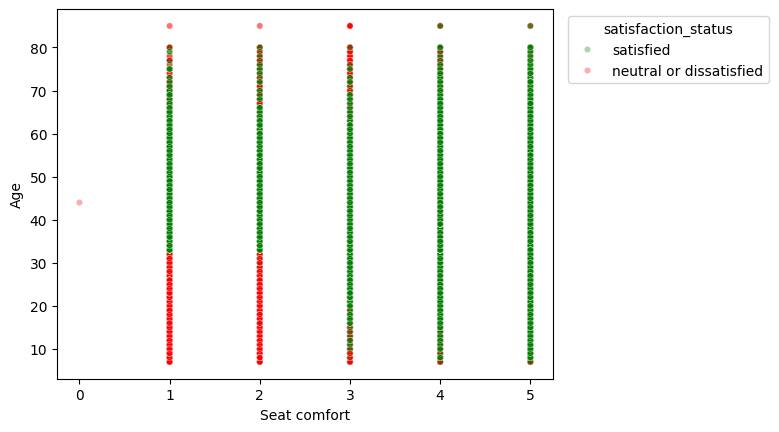

In [57]:
# Show in Scatterplot
axis = sns.scatterplot(
    data=df_original_v3_copy,
    x='Seat comfort',
    y='Age',
    hue='satisfaction_status',
    palette={
        'satisfied': 'green',
        'neutral or dissatisfied': 'red'
    },
    s=20,
    alpha=0.33
)
sns.move_legend(axis, loc='upper right' , bbox_to_anchor=(1.45, 1), ncol=1 )

array([[<Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Seat comfort'}>],
       [<Axes: title={'center': 'Cleanliness'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Inflight wifi service'}>],
       [<Axes: title={'center': 'Departure/Arrival time convenient'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Checkin service'}>]], dtype=object)

Text(0.5, 1, 'Histograms of Numerical Columns')

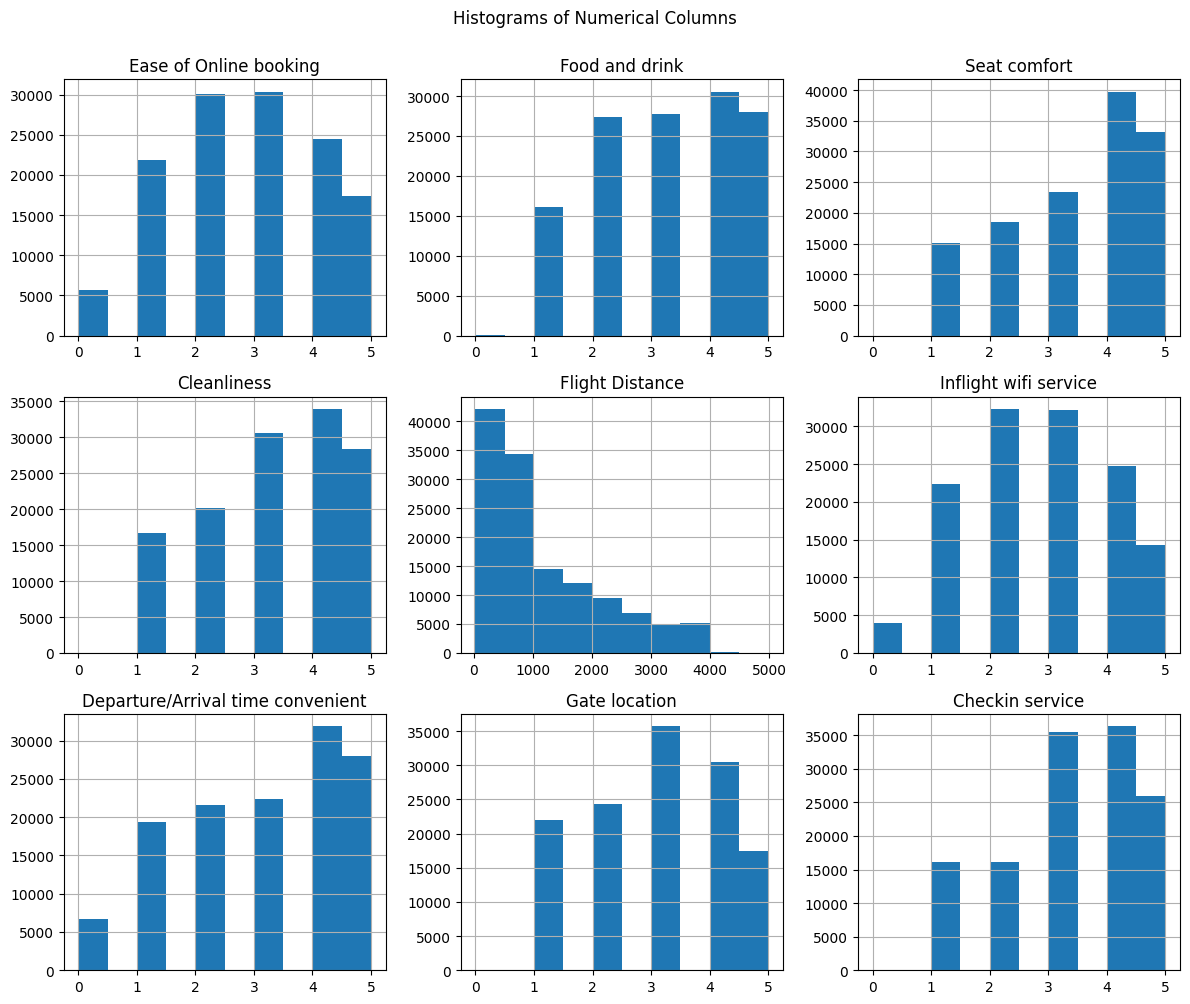

In [76]:
# View numerical feature distributions in histogram
selcted_cols=[
    'Ease of Online booking',
    'Food and drink',
    'Seat comfort',
    'Cleanliness',
    'Flight Distance',
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Gate location',
    'Checkin service'
  ]

df_original_v3_copy[selcted_cols].hist(bins=10, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Columns', y=1)
plt.tight_layout()
plt.show()

In [25]:
# Identify missing values
numberof_missing = df_original_v3_copy.isnull().sum().sum()
pecentage_missing = (numberof_missing/df_original_v3_copy.size)*100
print(f"Number of missing values: {numberof_missing:,} " + f"({pecentage_missing:.5f}%)")

Number of missing values: 393 (0.01210%)


In [26]:
# View missing values and column in a table
numberof_missing = df_original_v3_copy.isnull().sum()
numberof_missing = numberof_missing[numberof_missing > 0]
table = pd.DataFrame({
    "col": numberof_missing.index,
    "#missing values": numberof_missing.values
})
display(table)

,col,#missing values
0,Arrival Delay in Minutes,393


In [28]:
# Check for duplicated rows
df_original_v3_copy.duplicated(keep=False)
dupl_rows = df_original_v3_copy[df_original_v3_copy.duplicated(keep=False)]
print(f"Number of duplicated rows: {len(dupl_rows)}")

,0
0,False
1,False
2,False
3,False
4,False
...,...
129875,False
129876,False
129877,False
129878,False


Number of duplicated rows: 0
